In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [5]:
# 1. Read the CSV file into a pandas dataframe
df = pd.read_csv("../data/Fremont_Bridge_Bicycle_Counter.csv")

In [14]:
df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


In [24]:
# 2. Add columns to the dataframe containing:
# i. The total (East + West) bicycle count # the dataset contains this
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
# ii. The hour of the day
df['Hour'] = df.Date.dt.hour
# ii. The year
df['Year'] = df.Date.dt.year

In [71]:
# 3. Create a dataframe with the subset of data from the year 2016
df_2016_subset = df[df.Year == 2016].reset_index(drop=True)
df_2016_subset.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Hour,Year
0,2016-01-01 00:00:00,18.0,9.0,9.0,0,2016
1,2016-01-01 01:00:00,15.0,3.0,12.0,1,2016
2,2016-01-01 02:00:00,11.0,6.0,5.0,2,2016
3,2016-01-01 03:00:00,7.0,1.0,6.0,3,2016
4,2016-01-01 04:00:00,2.0,0.0,2.0,4,2016


Text(0, 0.5, 'Total Count')

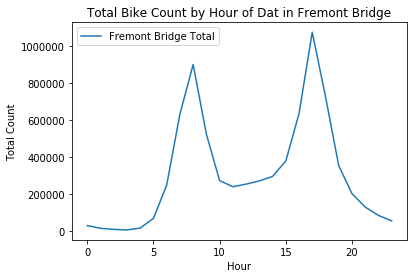

In [74]:
# 4. Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis) 
plot = df.groupby('Hour').agg({'Fremont Bridge Total' : 'sum'}).plot(title = 'Total Bike Count by Hour of Dat in Fremont Bridge')
plot.set_xlabel("Hour")
plot.set_ylabel("Total Count")

      mean_total
Hour            
17    392.289003
8     328.783339
18    265.710632
16    232.024114
7     231.050055
9     191.395102
15    138.525027
19    129.591158
14    108.267446
10    100.116228
13     99.488491
12     93.206140
6      91.177567
11     87.990863
20     74.476434
21     47.924004
22     31.556083
5      25.804531
23     20.815857
0      11.503836
4       6.572525
1       6.095360
2       3.994141
3       2.946292


Text(0, 0.5, 'Average Count')

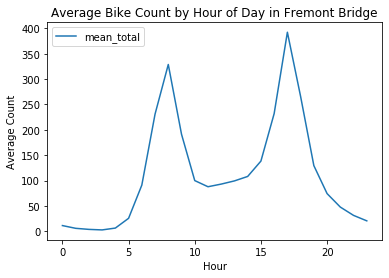

In [75]:
# 5. Use pandas to determine what is (on average) the busiest hour of the day
print(df.groupby('Hour').agg(mean_total = ('Fremont Bridge Total', 'mean')).sort_values('mean_total', ascending = False))
plot2 = df.groupby('Hour').agg(mean_total = ('Fremont Bridge Total', 'mean')).plot(title='Average Bike Count by Hour of Day in Fremont Bridge')
plot2.set_xlabel("Hour")
plot2.set_ylabel("Average Count")
# Busiest Hour is 17:00 or 5:00 pm